In [54]:
import yaml
import os
import sys
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


## Prepare a txt and dict of all var and query_type and associated paraphrases

### Vars

In [55]:

# Get list of all yml files in ../../cladder/assets/stories/
path = '../../cladder/assets/stories/'
files = os.listdir(path)
files_yml = [f for f in files if f[-4:] == '.yml']
# sort files_yml
files_yml.sort()
print(files_yml)

['alarm.yml', 'blood_pressure.yml', 'candle.yml', 'celebrity.yml', 'cholesterol.yml', 'college_salary.yml', 'college_wage.yml', 'elite_students.yml', 'encouagement_program.yml', 'firing_employee.yml', 'firing_squad.yml', 'floor_wet.yml', 'forest_fire.yml', 'gender_admission.yml', 'gender_admission_state.yml', 'gender_pay.yml', 'getting_late.yml', 'getting_tanned.yml', 'hospitalization.yml', 'man_in_relationship.yml', 'nature_vs_nurture.yml', 'neg_mediation.yml', 'nonsense0.yml', 'nonsense1.yml', 'nonsense2.yml', 'nonsense3.yml', 'nonsense4.yml', 'nonsense5.yml', 'nonsense6.yml', 'nonsense7.yml', 'nonsense8.yml', 'nonsense9.yml', 'obesity_mortality.yml', 'orange_scurvy.yml', 'penguin.yml', 'price.yml', 'simpson_drug.yml', 'simpson_hospital.yml', 'simpson_kidneystone.yml', 'simpson_vaccine.yml', 'smoke_birthWeight.yml', 'smoking_frontdoor.yml', 'smoking_gene_cancer.yml', 'smoking_tar_cancer.yml', 'tax_smoke_birthWeight.yml', 'vaccine_kills.yml', 'water_cholera.yml']


In [56]:
# Extract Xname, X1_noun, Yname, Y1_noun from each yml file
df = pd.DataFrame(columns=['Xname', 'X1_noun', 'Yname', 'Y1_noun'])
for file in files_yml:
    with open(path + file) as f:
        data = yaml.load(f, Loader=yaml.FullLoader)
    df = df.append({'Xname': data['Xname'], 'X1_noun': data['X1_noun'], 'Yname': data['Yname'], 'Y1_noun': data['Y1_noun']}, ignore_index=True)

df.head()

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_28726/2640151659.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Xname': data['Xname'], 'X1_noun': data['X1_noun'], 'Yname': data['Yname'], 'Y1_noun': data['Y1_noun']}, ignore_index=True)
/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_28726/2640151659.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Xname': data['Xname'], 'X1_noun': data['X1_noun'], 'Yname': data['Yname'], 'Y1_noun': data['Y1_noun']}, ignore_index=True)
/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_28726/2640151659.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Xname': data['Xname'], 'X1_noun': data['X1_noun'], '

,Xname,X1_noun,Yname,Y1_noun
0,husband,alarm set by husband,alarm clock,ringing alarm
1,medication,taking medication,heart condition,healthy heart
2,the man in the room,blowing out the candle,room,dark room
3,appearance,attractive appearance,talent,talent
4,drug taken,taking of all assigned drugs,cholesterol level,low cholesterol


In [57]:
# Lowercase all words
df['Xname'] = df['Xname'].str.lower()
df['X1_noun'] = df['X1_noun'].str.lower()
df['Yname'] = df['Yname'].str.lower()
df['Y1_noun'] = df['Y1_noun'].str.lower()


In [58]:
# Check if Xname and X1_noun are the same in some cases
df[df['Xname'] == df['X1_noun']]

,Xname,X1_noun,Yname,Y1_noun
7,talent,talent,effort,being hard-working
17,tanning salon treatment,tanning salon treatment,skin,tanned skin
18,respiratory issues,respiratory issues,broken bones,broken bones
21,smoking,smoking,college admission,college admission
22,rixq,rixq,xevu,xevu
23,kwox,kwox,kwoz,kwoz
24,xevo,xevo,gyzp,gyzp
25,yomx,yomx,xevu,xevu
26,jyka,jyka,lirg,lirg
27,jyka,jyka,kwox,kwox


In [59]:
# create a dictionary with Xname as key and Xname as value, if Xname and X1_noun are different also append X1_noun as a value to the key Xname

Xname_dict = {}
Yname_dict = {}
for index, row in df.iterrows():
    if row['Xname'] == row['X1_noun']:
        Xname_dict[row['Xname']] = row['Xname']
    else:
        Xname_dict[row['Xname']] = [row['Xname'], row['X1_noun']]
    if row['Yname'] == row['Y1_noun']:
        Yname_dict[row['Yname']] = row['Yname']
    else:
        Yname_dict[row['Yname']] = [row['Yname'], row['Y1_noun']]

# merge Xname_dict and Yname_dict
var_dict = {**Xname_dict, **Yname_dict}
var_dict

{'husband': ['husband', 'alarm set by husband'],
 'medication': ['medication', 'taking medication'],
 'the man in the room': ['the man in the room', 'blowing out the candle'],
 'appearance': ['appearance', 'attractive appearance'],
 'drug taken': ['drug taken', 'taking of all assigned drugs'],
 'education level': ['education level', 'college degree or higher'],
 'talent': 'talent',
 'encouragement level': ['encouragement level', 'encouragement'],
 'manager': ['manager', 'manager signing the termination letter'],
 'the captain': ['the captain', "the captain's order to execute the prisoner"],
 'season': ['season', 'rainy season'],
 'the camper': ['the camper', 'the camper lighting a match'],
 'gender': ['gender', 'male gender'],
 'alice waking up': ['alice waking up', 'waking up late'],
 'tanning salon treatment': 'tanning salon treatment',
 'respiratory issues': 'respiratory issues',
 'personality': ['personality', 'kindness'],
 "parents' intelligence": ["parents' intelligence", 'intell

In [60]:
# Write a txt file, each line is one element of Xname or X1_noun or Yname or Y1_noun

# Get list of all Xname, X1_noun, Yname, Y1_noun
import dis


Xname_list = df['Xname'].tolist()
X1_noun_list = df['X1_noun'].tolist()
Yname_list = df['Yname'].tolist()
Y1_noun_list = df['Y1_noun'].tolist()

# Combine all lists
var_list = Xname_list
var_list.extend(X1_noun_list)
var_list.extend(Yname_list)
var_list.extend(Y1_noun_list)

# Remove duplicates
var_list = list(dict.fromkeys(var_list))
var_list

['husband',
 'medication',
 'the man in the room',
 'appearance',
 'drug taken',
 'education level',
 'talent',
 'encouragement level',
 'manager',
 'the captain',
 'season',
 'the camper',
 'gender',
 'alice waking up',
 'tanning salon treatment',
 'respiratory issues',
 'personality',
 "parents' intelligence",
 'smoking',
 'rixq',
 'kwox',
 'xevo',
 'yomx',
 'jyka',
 'yupt',
 'zuph',
 'pexu',
 'obesity',
 'eating citrus',
 'my decision',
 'supply',
 'treatment',
 'hospital costs',
 'vaccination',
 'maternal smoking status',
 'gene',
 'vaccination status',
 'water quality',
 'alarm set by husband',
 'taking medication',
 'blowing out the candle',
 'attractive appearance',
 'taking of all assigned drugs',
 'college degree or higher',
 'encouragement',
 'manager signing the termination letter',
 "the captain's order to execute the prisoner",
 'rainy season',
 'the camper lighting a match',
 'male gender',
 'waking up late',
 'kindness',
 'intelligent parents',
 'citrus intake',
 'taking

### Query types

In [61]:
query_type_string = """ATE, Average treatment effect, ACE, average causal effect
ATT, Average Treatment Effect on the Treated, Effect of the Treatment on the Treated, ETT
NDE, Natural direct effect
NIE, Natural indirect effect
Correlation
Marginal Distribution, marginal
Expaining Away Effect, exp_away
Backdoor Adjustment Set, backadj
Collider Bias, collider_bias
Counterfactual (deterministic), det-counterfactua"""

In [62]:
# Lowercase all letters
query_type_string = query_type_string.lower()
# Parse query_type to df: split by \n, then by , first element in one column all others in another column
query_type = query_type_string.split('\n')
query_type = [q.split(',') for q in query_type]
#query_type = pd.DataFrame(query_type, columns=['query_type', 'query_type_short'])
#query_type = query_type[query_type['query_type'] != '']
query_type
# For each list in query_type, remove blank spaces at the beginning and end of each element
query_type = [[q.strip() for q in l] for l in query_type]
query_type

[['ate', 'average treatment effect', 'ace', 'average causal effect'],
 ['att',
  'average treatment effect on the treated',
  'effect of the treatment on the treated',
  'ett'],
 ['nde', 'natural direct effect'],
 ['nie', 'natural indirect effect'],
 ['correlation'],
 ['marginal distribution', 'marginal'],
 ['expaining away effect', 'exp_away'],
 ['backdoor adjustment set', 'backadj'],
 ['collider bias', 'collider_bias'],
 ['counterfactual (deterministic)', 'det-counterfactua']]

In [63]:
# Create a dictionary with first element as key, all other elements as values + the key repeated
query_type_dict = {}
for l in query_type:
    query_type_dict[l[0]] = l[1:]
    query_type_dict[l[0]].append(l[0])
query_type_dict

{'ate': ['average treatment effect', 'ace', 'average causal effect', 'ate'],
 'att': ['average treatment effect on the treated',
  'effect of the treatment on the treated',
  'ett',
  'att'],
 'nde': ['natural direct effect', 'nde'],
 'nie': ['natural indirect effect', 'nie'],
 'correlation': ['correlation'],
 'marginal distribution': ['marginal', 'marginal distribution'],
 'expaining away effect': ['exp_away', 'expaining away effect'],
 'backdoor adjustment set': ['backadj', 'backdoor adjustment set'],
 'collider bias': ['collider_bias', 'collider bias'],
 'counterfactual (deterministic)': ['det-counterfactua',
  'counterfactual (deterministic)']}

In [64]:
# Create a list of all elements in query_type
query_type_list = []
for l in query_type:
    query_type_list.extend(l)
query_type_list


['ate',
 'average treatment effect',
 'ace',
 'average causal effect',
 'att',
 'average treatment effect on the treated',
 'effect of the treatment on the treated',
 'ett',
 'nde',
 'natural direct effect',
 'nie',
 'natural indirect effect',
 'correlation',
 'marginal distribution',
 'marginal',
 'expaining away effect',
 'exp_away',
 'backdoor adjustment set',
 'backadj',
 'collider bias',
 'collider_bias',
 'counterfactual (deterministic)',
 'det-counterfactua']

### Combine vars and query_type

In [65]:
# Combine var_list and query_type_list
combined_list = var_list
combined_list.extend(query_type_list)

# Combine var_dict and query_type_dict
combined_dict = {**var_dict, **query_type_dict}


In [66]:
combined_dict

{'husband': ['husband', 'alarm set by husband'],
 'medication': ['medication', 'taking medication'],
 'the man in the room': ['the man in the room', 'blowing out the candle'],
 'appearance': ['appearance', 'attractive appearance'],
 'drug taken': ['drug taken', 'taking of all assigned drugs'],
 'education level': ['education level', 'college degree or higher'],
 'talent': 'talent',
 'encouragement level': ['encouragement level', 'encouragement'],
 'manager': ['manager', 'manager signing the termination letter'],
 'the captain': ['the captain', "the captain's order to execute the prisoner"],
 'season': ['season', 'rainy season'],
 'the camper': ['the camper', 'the camper lighting a match'],
 'gender': ['gender', 'male gender'],
 'alice waking up': ['alice waking up', 'waking up late'],
 'tanning salon treatment': 'tanning salon treatment',
 'respiratory issues': 'respiratory issues',
 'personality': ['personality', 'kindness'],
 "parents' intelligence": ["parents' intelligence", 'intell

In [67]:
# Write to txt file
with open('../data/pile_query.txt', 'w') as f:
    for item in combined_list:
        f.write("%s\n" % item)

## Run the pile script

DONE. Result saved in `pile_count_merged.jsonl`

## Analysis 
Group the counts using the previous dictionary

In [68]:
import json
# load count json file 
with open('../merged_counts.json') as f:
    data = json.load(f)

data

{'waking up late': 2076,
 'ate': 2522432930,
 'infant mortality': 152441,
 'pexu': 3244,
 'supply': 13467810,
 'average treatment effect on the treated': 1205,
 'yomx': 425,
 'ringing alarm': 2474,
 'lifespan': 843630,
 'personality': 4158959,
 'hospital costs': 41639,
 'counterfactual (deterministic)': 0,
 'taking of all assigned drugs': 0,
 'admission status': 4883,
 'alice arriving to school': 0,
 'penguin death': 110,
 'kwox': 553,
 'rainy season': 191200,
 'nde': 832492163,
 'average treatment effect': 15812,
 'kwoz': 520,
 'salary': 3052680,
 'muvq': 480,
 'det-counterfactua': 0,
 'ground': 71791763,
 'the captain': 1768842,
 'talent': 7422693,
 'prisoner': 5468473,
 'male gender': 213808,
 'ace': 531273703,
 'room': 66399777,
 'getting the vaccine': 2144,
 'broken bones': 87533,
 'my decision': 261357,
 'rukz': 2045,
 'encouragement': 1032574,
 'increased price': 19706,
 'marginal': 3559898,
 'nie': 95859431,
 'average causal effect': 4506,
 'employee being fired': 135,
 'obesit

In [69]:
# iterate over all file in "../out/pile_counts/" and sum all values of the key "waking up late"
import os
import json
import numpy as np

path = '../out/pile_counts/'
files = os.listdir(path)
files_json = [f for f in files if f[-5:] == '.json']
files_json.sort()
files_json

# open and iterate over all files and sum all values of the key "waking up late"
counts = []
for file in files_json:
    with open(path + file) as f:
        temp = json.load(f)
    counts.append(temp['waking up late'])


# sum all counts and print comapred to the count in the merged_counts.json file
print(sum(counts))
print(data['waking up late'])

2076
2076


In [70]:
# Use key:count dict data to create a new dict summing up all counts for each key in combined_dict
combined_dict_count = {}
for key in combined_dict:
    if isinstance(combined_dict[key], list):
        combined_dict_count[key] = 0
        for item in combined_dict[key]:
            combined_dict_count[key] += data[item]
    else:
        combined_dict_count[key] = data[combined_dict[key]]

# Sort combined_dict_count alphabetically
combined_dict_count = dict(sorted(combined_dict_count.items(), key=lambda item: item[0]))

combined_dict_count


{'admission status': 5006,
 'alarm clock': 159763,
 'alice arriving to school': 33,
 'alice waking up': 2102,
 'appearance': 13063627,
 'ate': 3053726951,
 'att': 745292559,
 'backdoor adjustment set': 295,
 'broken bones': 87533,
 "child's intelligence": 7038,
 'cholera': 628487,
 'cholesterol level': 342959,
 'college admission': 65695,
 'collider bias': 1997,
 'correlation': 17770982,
 'counterfactual (deterministic)': 0,
 'disease': 46993190,
 'drug taken': 2896,
 'eating citrus': 557,
 'education level': 325050,
 'effort': 24900415,
 'employee': 21225917,
 'encouragement level': 1032610,
 'exam score': 17722,
 'expaining away effect': 0,
 'gender': 11710030,
 'gene': 290122569,
 'glimx': 7,
 'ground': 71806539,
 'gyzp': 415,
 'heart condition': 115049,
 'hospital costs': 41754,
 'husband': 13206367,
 'infant mortality': 158487,
 "infant's birth weight": 587,
 'jyka': 2101,
 'kwox': 553,
 'kwoz': 520,
 'lifespan': 861504,
 'lirg': 118254,
 'lung cancer': 1999122,
 'manager': 247902

In [71]:
# save combined_dict_count to json file
with open('../out/cladder_pile_counts.json', 'w') as f:
    json.dump(combined_dict_count, f)

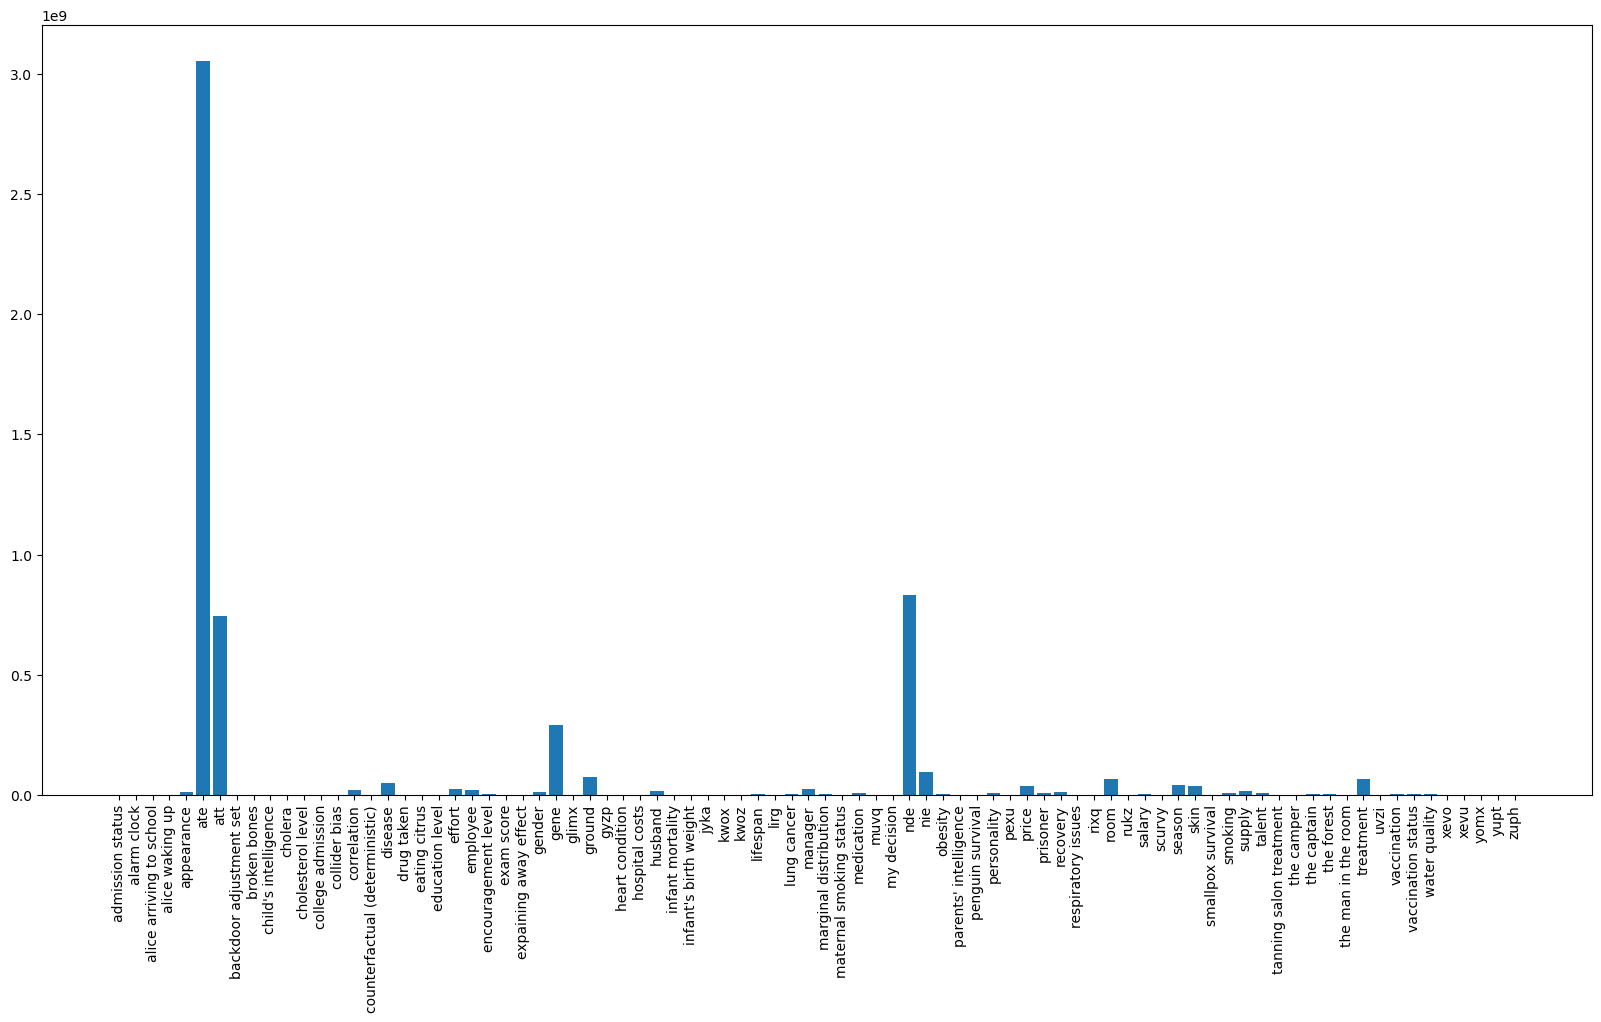

In [72]:
# Plot combined_dict_count
import matplotlib.pyplot as plt
import numpy as np

# Plot combined_dict_count
plt.figure(figsize=(20, 10))
plt.bar(combined_dict_count.keys(), combined_dict_count.values())
plt.xticks(rotation=90)
plt.show()

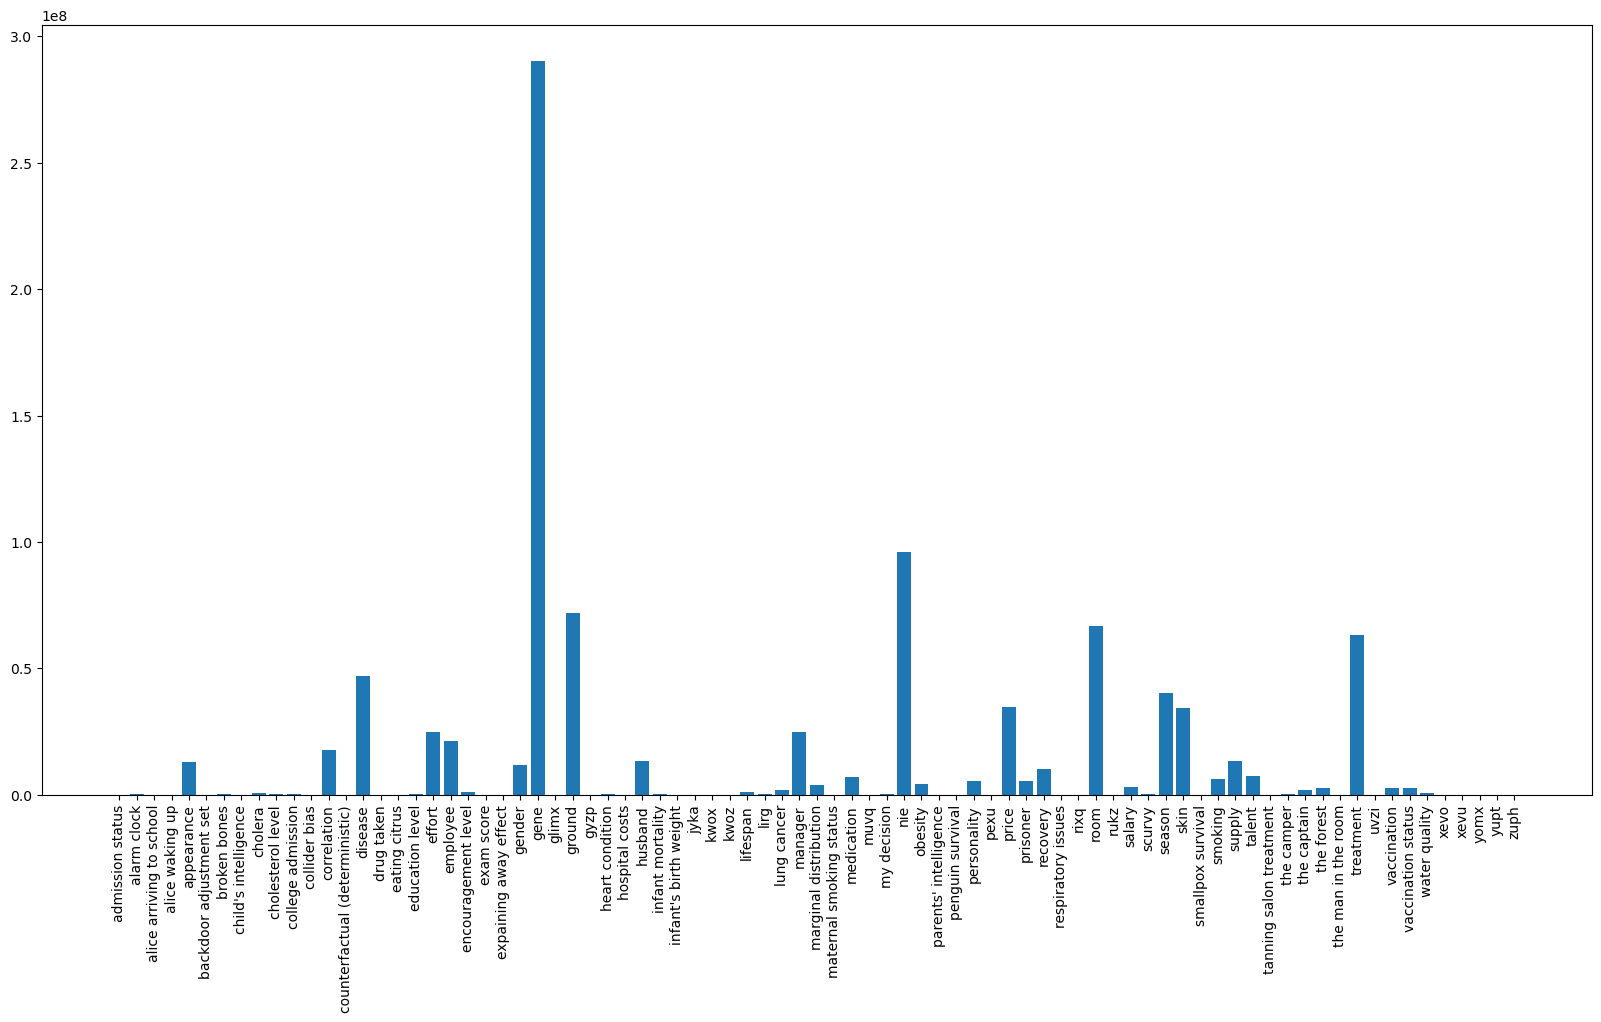

In [73]:

# drop keys: ate, att, nde
combined_dict_count.pop('ate', None)
combined_dict_count.pop('att', None)
combined_dict_count.pop('nde', None)



# Plot combined_dict_count
plt.figure(figsize=(20, 10))
plt.bar(combined_dict_count.keys(), combined_dict_count.values())
plt.xticks(rotation=90)
plt.show()
